In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pets-facial-expression-dataset/Other/aug-88-54.jpg
/kaggle/input/pets-facial-expression-dataset/Other/45.jpg
/kaggle/input/pets-facial-expression-dataset/Other/56.jpg
/kaggle/input/pets-facial-expression-dataset/Other/aug-141-02.jpg
/kaggle/input/pets-facial-expression-dataset/Other/20.jpg
/kaggle/input/pets-facial-expression-dataset/Other/aug-37-49.jpg
/kaggle/input/pets-facial-expression-dataset/Other/58.jpg
/kaggle/input/pets-facial-expression-dataset/Other/aug-168-37.jpg
/kaggle/input/pets-facial-expression-dataset/Other/aug-80-43.jpg
/kaggle/input/pets-facial-expression-dataset/Other/aug-183-55.jpg
/kaggle/input/pets-facial-expression-dataset/Other/aug-114-30.jpg
/kaggle/input/pets-facial-expression-dataset/Other/aug-152-19.jpg
/kaggle/input/pets-facial-expression-dataset/Other/aug-180-52.jpg
/kaggle/input/pets-facial-expression-dataset/Other/aug-195-12.jpg
/kaggle/input/pets-facial-expression-dataset/Other/aug-123-39.jpg
/kaggle/input/pets-facial-expression-dataset/

In [4]:
import tensorflow
import keras 
from keras import Sequential 
from keras.layers import Dense,Flatten,Conv2D,AveragePooling2D,MaxPooling2D
import warnings

with warnings.catch_warnings():
    warnings.simplefilter("ignore")

In [5]:
from keras.utils import image_dataset_from_directory

In [6]:
from tensorflow.keras.callbacks import EarlyStopping

In [7]:
es =tensorflow.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0,
    patience=3,
    verbose=0,
    mode="auto",
)

In [8]:
#for coloured image
train = image_dataset_from_directory(
          directory = '/kaggle/input/pets-facial-expression-dataset/Master Folder/train',
          labels = 'inferred',
          label_mode = 'int',
          batch_size = 50,
          image_size = (227,227),
          color_mode='grayscale'
)

Found 1000 files belonging to 4 classes.


In [9]:
#for coloured image
val = image_dataset_from_directory(
          directory = '/kaggle/input/pets-facial-expression-dataset/Master Folder/valid',
          labels = 'inferred',
          label_mode = 'int',
          batch_size = 50,
          image_size = (227,227),
          color_mode='grayscale'

)

Found 36 files belonging to 4 classes.


# Applying a random convolutional layer 

In [10]:
model = Sequential()
model.add(Conv2D(40, (10, 10), activation='relu', input_shape=(227, 227, 1)))  
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(20, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Flatten())

model.add(Dense(60, activation='relu'))
model.add(Dense(40, activation='relu'))
model.add(Dense(4, activation='softmax'))

In [11]:
model.compile(optimizer = 'adam',loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])

In [12]:
history = model.fit(train , epochs = 30,validation_data = val,callbacks=es)

Epoch 1/30
20/20 [==============================] - 94s 5s/step - loss: 25.5532 - accuracy: 0.2640 - val_loss: 1.3858 - val_accuracy: 0.2778
Epoch 2/30
20/20 [==============================] - 92s 5s/step - loss: 1.3771 - accuracy: 0.2860 - val_loss: 1.3853 - val_accuracy: 0.3056
Epoch 3/30
20/20 [==============================] - 93s 5s/step - loss: 1.3342 - accuracy: 0.3110 - val_loss: 1.4107 - val_accuracy: 0.2500
Epoch 4/30
20/20 [==============================] - 93s 5s/step - loss: 1.2223 - accuracy: 0.3910 - val_loss: 1.6237 - val_accuracy: 0.1944
Epoch 5/30
20/20 [==============================] - 92s 5s/step - loss: 1.0605 - accuracy: 0.4760 - val_loss: 1.8990 - val_accuracy: 0.1944


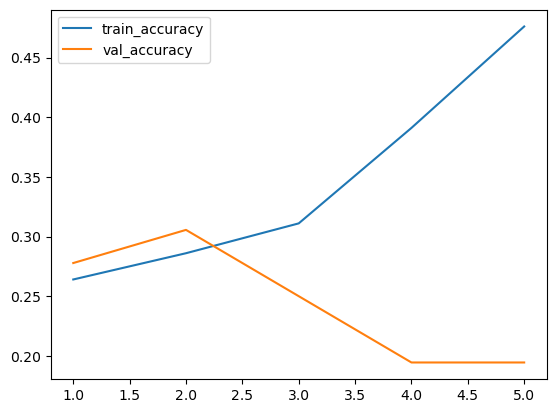

In [14]:
import matplotlib.pyplot as plt
plt.plot(range(1,6),history.history["accuracy"],label="train_accuracy")
plt.plot(range(1,6),history.history["val_accuracy"],label="val_accuracy")
plt.legend()

# Applying le_net or lenet-5

In [15]:
#for gray scale image
train = image_dataset_from_directory(
          directory = "/kaggle/input/pets-facial-expression-dataset/Master Folder/train",
          labels = 'inferred',
          color_mode = 'grayscale',
          label_mode = 'int',
          batch_size = 32,
          image_size = (256,256)
)

Found 1000 files belonging to 4 classes.


In [16]:
val=    image_dataset_from_directory(
        directory = "/kaggle/input/pets-facial-expression-dataset/Master Folder/valid",
        labels = 'inferred',
        label_mode = 'int',
        color_mode = 'grayscale',
        batch_size = 32,
        image_size = (256,256)
)

Found 36 files belonging to 4 classes.


In [17]:
# Before we need to convert them into gray scale 
# Converting them to gray scale we can use 2 methods 1.dividing with 255
# or we can use imagedatagenerater 
from keras.preprocessing.image import ImageDataGenerator

In [18]:
train= ImageDataGenerator(rescale=1.0//255)

In [19]:
val= ImageDataGenerator(rescale=1.0//255)

In [20]:
trainf = train.flow_from_directory('/kaggle/input/pets-facial-expression-dataset/Master Folder/train', 
                          target_size=(256, 256),batch_size=32,class_mode="categorical")

Found 1000 images belonging to 4 classes.


In [21]:
valf = train.flow_from_directory("/kaggle/input/pets-facial-expression-dataset/Master Folder/valid", 
                          target_size=(256, 256),batch_size=32,class_mode="categorical")

Found 36 images belonging to 4 classes.


In [22]:
model  = Sequential()
model.add(Conv2D(6,(5,5),activation ='tanh',input_shape=(256,256,3)))
model.add(AveragePooling2D((2,2),strides=(2,2)))
model.add(Conv2D(16,(5,5),activation ='tanh'))
model.add(AveragePooling2D((2,2),strides=2))

model.add(Flatten())

model.add(Dense(120,activation ='sigmoid'))
model.add(Dense(84,activation ='sigmoid'))
model.add(Dense(4,activation ='softmax'))

In [23]:
model.compile(optimizer = 'sgd',loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [28]:
trainf.image_shape

(256, 256, 3)

In [24]:
history = model.fit(trainf ,steps_per_epoch=trainf.samples//32 , epochs = 30,
                    validation_data = valf,validation_steps = valf.samples//32,callbacks=es)

Epoch 1/30
31/31 [==============================] - 35s 1s/step - loss: 1.4363 - accuracy: 0.2459 - val_loss: 1.3830 - val_accuracy: 0.2500
Epoch 2/30
31/31 [==============================] - 34s 1s/step - loss: 1.3905 - accuracy: 0.2366 - val_loss: 1.3814 - val_accuracy: 0.2500
Epoch 3/30
31/31 [==============================] - 33s 1s/step - loss: 1.3853 - accuracy: 0.2645 - val_loss: 1.3870 - val_accuracy: 0.2500
Epoch 4/30
31/31 [==============================] - 33s 1s/step - loss: 1.3871 - accuracy: 0.2593 - val_loss: 1.3648 - val_accuracy: 0.3438
Epoch 5/30
31/31 [==============================] - 33s 1s/step - loss: 1.3883 - accuracy: 0.2541 - val_loss: 1.3796 - val_accuracy: 0.3125
Epoch 6/30
31/31 [==============================] - 33s 1s/step - loss: 1.3841 - accuracy: 0.2655 - val_loss: 1.3812 - val_accuracy: 0.2812
Epoch 7/30
31/31 [==============================] - 33s 1s/step - loss: 1.3842 - accuracy: 0.2552 - val_loss: 1.3762 - val_accuracy: 0.3438


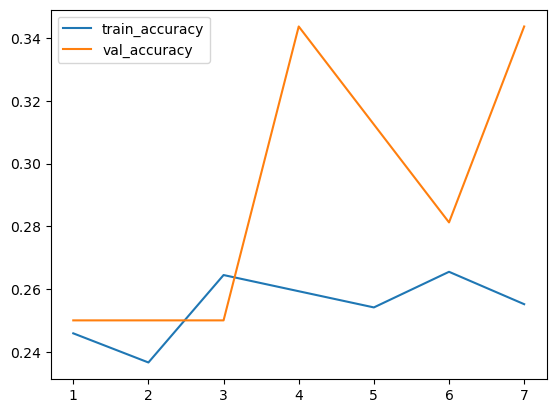

In [25]:
import matplotlib.pyplot as plt
plt.plot(range(1,8),history.history["accuracy"],label="train_accuracy")
plt.plot(range(1,8),history.history["val_accuracy"],label="val_accuracy")
plt.legend()

# applying alexnet 

In [26]:
#for gray scale image
train = image_dataset_from_directory(
          directory = "/kaggle/input/pets-facial-expression-dataset/Master Folder/train",
          labels = 'inferred',
          color_mode = 'grayscale',
          label_mode = 'int',
          batch_size = 32,
          image_size = (227,227)
)

Found 1000 files belonging to 4 classes.


In [27]:
#for coloured image
val = image_dataset_from_directory(
          directory = '/kaggle/input/pets-facial-expression-dataset/Master Folder/valid',
          labels = 'inferred',
          label_mode = 'int',
          batch_size = 50,
          image_size = (227,227),
          color_mode='grayscale'

)

Found 36 files belonging to 4 classes.


In [28]:
model = Sequential()
model.add(Conv2D(96,(11,11),strides =(4,4) ,activation = 'relu',input_shape=(227,227,1)))
model.add(MaxPooling2D(pool_size =(3,3),strides =(2,2)))
model.add(Conv2D(256,(5,5),activation = 'relu',padding="same"))
model.add(MaxPooling2D(pool_size =(3,3),strides =(2,2)))
model.add(Conv2D(384,(3,3),activation = 'relu',padding="same"))
model.add(Conv2D(384,(3,3),activation = 'relu',padding="same"))
model.add(Conv2D(256,(3,3),activation = 'relu',padding="same"))
model.add(MaxPooling2D(pool_size =(3,3),strides =(2,2)))
          
model.add(Flatten())

model.add(Dense(4096,activation = 'relu'))
#model.add(Dropout(0.2))
model.add(Dense(4096,activation = 'relu'))
#model.add(Dropout(0.2))
model.add(Dense(4,activation = 'softmax'))

In [29]:
model.compile(optimizer = 'adam',loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])

In [30]:
history = model.fit(train , epochs = 30,validation_data = val,callbacks=es)

Epoch 1/30
32/32 [==============================] - 89s 3s/step - loss: 90.9982 - accuracy: 0.2420 - val_loss: 1.3942 - val_accuracy: 0.2500
Epoch 2/30
32/32 [==============================] - 86s 3s/step - loss: 1.3906 - accuracy: 0.2600 - val_loss: 1.3853 - val_accuracy: 0.2778
Epoch 3/30
32/32 [==============================] - 86s 3s/step - loss: 1.3827 - accuracy: 0.2430 - val_loss: 1.3403 - val_accuracy: 0.3889
Epoch 4/30
32/32 [==============================] - 87s 3s/step - loss: 1.4015 - accuracy: 0.2610 - val_loss: 1.3845 - val_accuracy: 0.3056
Epoch 5/30
32/32 [==============================] - 87s 3s/step - loss: 1.3872 - accuracy: 0.2360 - val_loss: 1.3866 - val_accuracy: 0.1667
Epoch 6/30
32/32 [==============================] - 87s 3s/step - loss: 1.3867 - accuracy: 0.2500 - val_loss: 1.3871 - val_accuracy: 0.1667


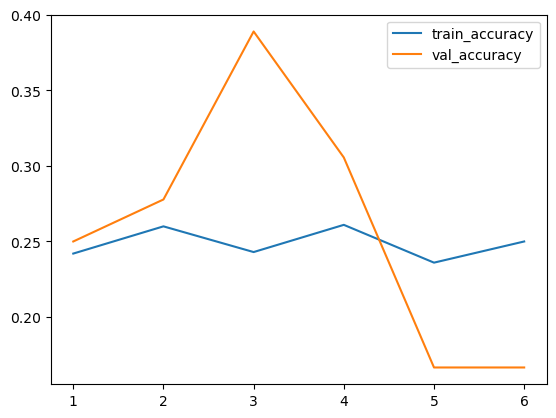

In [32]:
#import matplotlib.pyplot as plt
plt.plot(range(1,7),history.history["accuracy"],label="train_accuracy")
plt.plot(range(1,7),history.history["val_accuracy"],label="val_accuracy")
plt.legend()

# data is less so using augementation to generate more data 


In [34]:
train= ImageDataGenerator( rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.3,
    brightness_range=(5,12),
    shear_range=0.3,
    zoom_range=0.4,rescale=1.0//255)

In [35]:
val= ImageDataGenerator(rescale=1.0//255)

In [36]:
trainf = train.flow_from_directory('/kaggle/input/pets-facial-expression-dataset/Master Folder/train', 
                          target_size=(227, 227),batch_size=32,class_mode="categorical")

Found 1000 images belonging to 4 classes.


In [37]:
valf = train.flow_from_directory("/kaggle/input/pets-facial-expression-dataset/Master Folder/valid", 
                          target_size=(227, 227),batch_size=32,class_mode="categorical")

Found 36 images belonging to 4 classes.


In [146]:
trainf.image_shape

(227, 227, 3)

In [38]:
model = Sequential()
model.add(Conv2D(96,(11,11),strides =(4,4) ,activation = 'relu',input_shape=(227,227,3)))
model.add(MaxPooling2D(pool_size =(3,3),strides =(2,2)))
model.add(Conv2D(256,(5,5),activation = 'relu',padding="same"))
model.add(MaxPooling2D(pool_size =(3,3),strides =(2,2)))
model.add(Conv2D(384,(3,3),activation = 'relu',padding="same"))
model.add(Conv2D(384,(3,3),activation = 'relu',padding="same"))
model.add(Conv2D(256,(3,3),activation = 'relu',padding="same"))
model.add(MaxPooling2D(pool_size =(3,3),strides =(2,2)))
          
model.add(Flatten())

model.add(Dense(4096,activation = 'relu'))
#model.add(Dropout(0.2))
model.add(Dense(4096,activation = 'relu'))
#model.add(Dropout(0.2))
model.add(Dense(4,activation = 'softmax'))

In [39]:
model.compile(optimizer = 'adam',loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [40]:
history = model.fit(trainf ,steps_per_epoch=trainf.samples//32 , epochs = 30,validation_data = valf,validation_steps = valf.samples//32,callbacks=es)

Epoch 1/30
31/31 [==============================] - 98s 3s/step - loss: 415.5726 - accuracy: 0.2386 - val_loss: 1.4307 - val_accuracy: 0.1562
Epoch 2/30
31/31 [==============================] - 95s 3s/step - loss: 1.3904 - accuracy: 0.2428 - val_loss: 1.3858 - val_accuracy: 0.2812
Epoch 3/30
31/31 [==============================] - 94s 3s/step - loss: 1.3910 - accuracy: 0.2397 - val_loss: 1.3881 - val_accuracy: 0.1875
Epoch 4/30
31/31 [==============================] - 94s 3s/step - loss: 1.3913 - accuracy: 0.2304 - val_loss: 1.3874 - val_accuracy: 0.1875
Epoch 5/30
31/31 [==============================] - 94s 3s/step - loss: 1.3869 - accuracy: 0.2438 - val_loss: 1.3853 - val_accuracy: 0.3438
Epoch 6/30
31/31 [==============================] - 95s 3s/step - loss: 1.3872 - accuracy: 0.2314 - val_loss: 1.3848 - val_accuracy: 0.2500
Epoch 7/30
31/31 [==============================] - 94s 3s/step - loss: 1.3863 - accuracy: 0.2469 - val_loss: 1.3846 - val_accuracy: 0.3125
Epoch 8/30
31/31 [

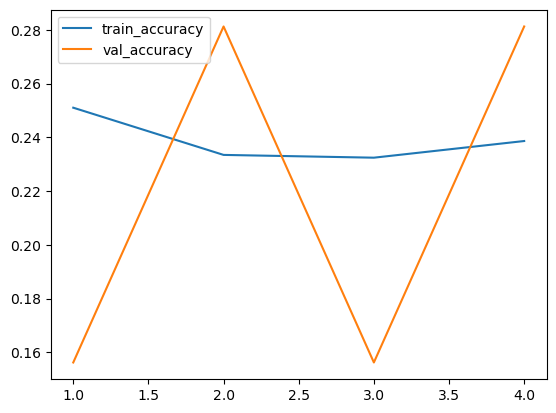

In [151]:
import matplotlib.pyplot as plt
plt.plot(range(1,5),history.history["accuracy"],label="train_accuracy")
plt.plot(range(1,5),history.history["val_accuracy"],label="val_accuracy")
plt.legend()

In [41]:
history = model.fit(trainf ,steps_per_epoch=trainf.samples//32 , epochs = 20,validation_data = valf,validation_steps = valf.samples//32)

Epoch 1/20
31/31 [==============================] - 94s 3s/step - loss: 1.3866 - accuracy: 0.2273 - val_loss: 1.3854 - val_accuracy: 0.2812
Epoch 2/20
31/31 [==============================] - 94s 3s/step - loss: 1.3839 - accuracy: 0.2459 - val_loss: 1.3857 - val_accuracy: 0.3438
Epoch 3/20
31/31 [==============================] - 93s 3s/step - loss: 1.4057 - accuracy: 0.2366 - val_loss: 1.3878 - val_accuracy: 0.2812
Epoch 4/20
31/31 [==============================] - 94s 3s/step - loss: 1.3877 - accuracy: 0.2510 - val_loss: 1.3853 - val_accuracy: 0.2500
Epoch 5/20
31/31 [==============================] - 93s 3s/step - loss: 1.3881 - accuracy: 0.2521 - val_loss: 1.5007 - val_accuracy: 0.2500
Epoch 6/20
31/31 [==============================] - 93s 3s/step - loss: 1.3914 - accuracy: 0.2345 - val_loss: 1.3843 - val_accuracy: 0.3438
Epoch 7/20
31/31 [==============================] - 93s 3s/step - loss: 1.4059 - accuracy: 0.2490 - val_loss: 1.3866 - val_accuracy: 0.1875
Epoch 8/20
31/31 [==

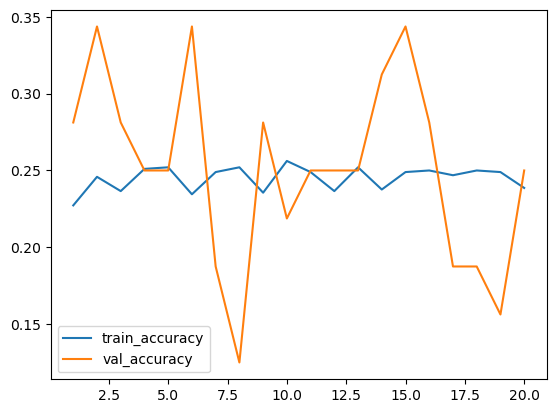

In [42]:
#import matplotlib.pyplot as plt
plt.plot(range(1,21),history.history["accuracy"],label="train_accuracy")
plt.plot(range(1,21),history.history["val_accuracy"],label="val_accuracy")
plt.legend()